In [1]:
import extract_and_transform as et
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
import os
import joblib
import pandas as pd



X_train,X_test,y_train,y_test,real_df,X,y=et.training_data()



scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)



feature_names=["cement","blast_furnace_slage","fly_ash","water","superplasticizer","coarse_aggregate","fine_aggregate","age"]

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np

max_depth = [45]#[int(x) for x in np.linspace(1,201,10)]
max_depth.append(None)
param_grid={'bootstrap':[False],
            'max_depth':max_depth,
            'max_features':['auto','log2'],
            'n_estimators': [156]}#[int(x) for x in np.linspace(1, 201, 10)] }

rfr=RandomForestRegressor(random_state=1)

g_search=GridSearchCV(estimator=rfr,param_grid=param_grid,cv=5,n_jobs=1,verbose=0,return_train_score=True)

g_search.fit(X_train,y_train)



best_params_dict=g_search.best_params_

best_params_df=pd.DataFrame([best_params_dict],index=['Best Parameters']).T

best_params_df.to_csv('Resources/best_params.csv')

predictions=g_search.predict(X_test)
mse_rf=mean_squared_error(y_test,predictions)
mae_rf=mean_absolute_error(y_test,predictions)
stats={'MSE':mse_rf.round(2),'MAE': mae_rf.round(2),'r_score':(g_search.score(X_test,y_test)).round(2)}
stats_df=pd.DataFrame([stats],index=['Best Features']).T

stats_df.to_csv('Resources/rfr_stats.csv')


feature_imp=pd.Series(g_search.best_estimator_.feature_importances_,index=feature_names).sort_values()

best_features=pd.DataFrame([(feature_imp.round(2)*100).round(2).to_dict()],index=['Random Forest Stats (%)']).T

best_features.to_csv('Resources/best_features.csv')

def print_predict(y_test,predictions):
    for i in range(len(predictions)):
        act=y_test[i]
        pred=round(predictions[i],2)
        delta=round(act-pred,2)
        print(f"Actual: {act}, Prediction: {pred}, Delta: {delta}")




print_predict(y_test,predictions)

# save
joblib.dump(g_search, "random_forest_regression.joblib")

# load, no need to initialize the loaded_rf
rfr_model = joblib.load("random_forest_regression.joblib")



# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np

# n_estimators = [int(x) for x in np.linspace(5 , 150, 145)] 

# max_depth = [int(x) for x in np.linspace(1,200,200)]
# max_depth.append(None)

# max_depth

# bootstrap=[True,False]

# random_grid={'n_estimators':n_estimators,'max_features':['auto','log2'],'max_depth':max_depth,'bootstrap':bootstrap}

# print(random_grid)

# random_search=RandomizedSearchCV(estimator=rfr,
#                                  param_distributions=random_grid,
#                                  n_iter=50,scoring='neg_mean_absolute_error',
#                                 cv=3,verbose=0,random_state=42,
#                                  n_jobs=1,return_train_score=True)

# random_search.fit(X_train,y_train)

# random_search.best_params_

# random_search.score(X_test,y_test)

# print_predict(y_test,random_search.predict(X_test))

Actual: 29.75, Prediction: 26.45, Delta: 3.3
Actual: 25.57, Prediction: 26.44, Delta: -0.87
Actual: 15.87, Prediction: 15.17, Delta: 0.7
Actual: 8.0, Prediction: 11.85, Delta: -3.85
Actual: 0.0, Prediction: 0.0, Delta: 0.0
Actual: 33.7, Prediction: 32.57, Delta: 1.13
Actual: 38.22, Prediction: 33.69, Delta: 4.53
Actual: 33.42, Prediction: 33.27, Delta: 0.15
Actual: 0.0, Prediction: 0.0, Delta: 0.0
Actual: 39.84, Prediction: 29.06, Delta: 10.78
Actual: 0.0, Prediction: 0.0, Delta: 0.0
Actual: 12.37, Prediction: 18.02, Delta: -5.65
Actual: 24.5, Prediction: 27.77, Delta: -3.27
Actual: 71.7, Prediction: 69.02, Delta: 2.68
Actual: 38.6, Prediction: 34.93, Delta: 3.67
Actual: 51.72, Prediction: 52.79, Delta: -1.07
Actual: 66.42, Prediction: 49.32, Delta: 17.1
Actual: 47.97, Prediction: 58.51, Delta: -10.54
Actual: 43.57, Prediction: 43.49, Delta: 0.08
Actual: 23.52, Prediction: 23.67, Delta: -0.15
Actual: 41.93, Prediction: 42.86, Delta: -0.93
Actual: 34.4, Prediction: 35.1, Delta: -0.7
Act

In [6]:
import Jinja2
print(Jinjas2.__version__)

1.1.2


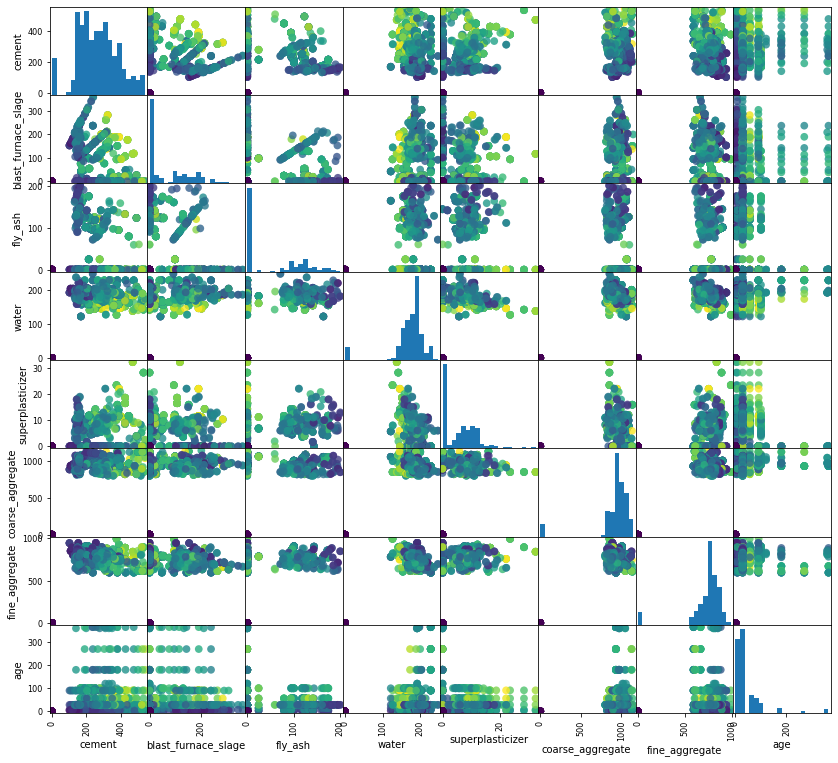

In [14]:
import matplotlib.pyplot as plt

# Create a scatter matrix from the dataframe, color by y_train
grr = pd.plotting.scatter_matrix(X, c=y, figsize=(14, 13), marker='o',
                                 hist_kwds={'bins': 20}, s=60, alpha=.8)
plt.savefig('static/image/scatter_matrix_sm.png')
plt.show()

<Figure size 432x288 with 0 Axes>